<a href="https://colab.research.google.com/github/f1shyfang/Hackerton-csesoc-summer/blob/main/website_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install networkx[default]

SyntaxError: invalid syntax (<ipython-input-175-bead6d1ca295>, line 1)

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
#works



In [190]:
def load_data(file_path="realdata.csv"):
  df = pd.read_csv(file_path)
  z = np.abs(stats.zscore(df['Y']))
  threshold = 3
  filtered_df = df[(z < threshold)]
  y = np.abs(stats.zscore(df['X']))
  threshold = 3
  filtered_df = df[(y < threshold)]

  stars = filtered_df.to_dict(orient="records")
  return stars

#convert to a dictonary since no need to clean data


In [191]:


stars_to_remove = ["rho Cas", "phi Cas", "eps Aur"]

# Create a new list excluding stars to remove
filtered_stars = [star for star in stars if star.get("IAU Name") not in stars_to_remove]

# Update the 'stars' variable with the filtered list
stars = filtered_stars

In [192]:

def plot_stars(stars):
    x_coords = [star["X"] for star in stars]
    y_coords = [star["Y"] for star in stars]
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, s=8)  # Adjust point size (s) as needed
    plt.xlabel("X (light-years)")
    plt.ylabel("Y (light-years)")
    plt.title("Star Positions on Cartesian Plane")
    #for star in stars:
        #plt.annotate(star["IAU Name"], (star["X"], star["Y"]), textcoords="offset points", xytext=(1,1), ha='left')
    plt.grid(True)
    plt.show(block=True)


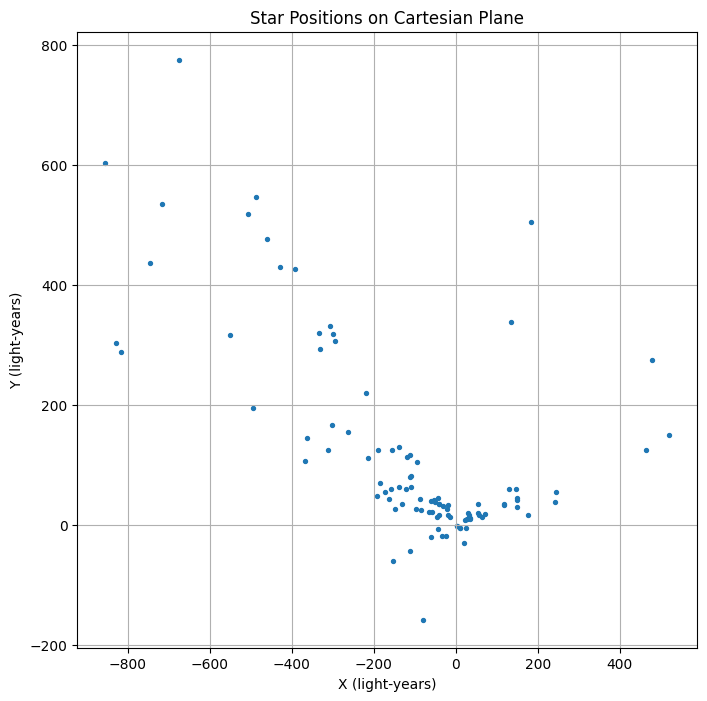

In [193]:
%matplotlib inline
stars = load_data("realdata.csv")  # Assuming 'load_data' is defined as in your previous code
plot_stars(stars)  # Call the function to generate and display the plot

In [194]:
print(stars)

[{'IAU Name': 'alf Cen A', 'Visual Magnitude': 0.01, 'HR ID': 5459, 'HD ID': 128620, 'HIP ID': 71683, 'Distance': 4.37, 'X': 3.957477773082988, 'Y': -1.5957115249630285}, {'IAU Name': 'alf Cen B', 'Visual Magnitude': 1.33, 'HR ID': 5460, 'HD ID': 128621, 'HIP ID': 71681, 'Distance': 4.37, 'X': 3.957477773082988, 'Y': -1.5957115249630285}, {'IAU Name': 'bet Pic', 'Visual Magnitude': 3.85, 'HR ID': 2020, 'HD ID': 39060, 'HIP ID': 26351, 'Distance': 63.41, 'X': -60.30616797404346, 'Y': -19.647315335111458}, {'IAU Name': 'tau Cet', 'Visual Magnitude': 3.5, 'HR ID': 677, 'HD ID': 10700, 'HIP ID': 3225, 'Distance': 11.86, 'X': 10.548980283505157, 'Y': -5.311168355521118}, {'IAU Name': 'gam Pav', 'Visual Magnitude': 4.21, 'HR ID': 6306, 'HD ID': 172167, 'HIP ID': 91373, 'Distance': 30.11, 'X': -23.60841693980771, 'Y': -19.100993733117445}, {'IAU Name': 'kap Cru', 'Visual Magnitude': 5.98, 'HR ID': 4860, 'HD ID': 111973, 'HIP ID': 62717, 'Distance': 363.64, 'X': 134.1527309119929, 'Y': 337.816

In [195]:
def build_graph(stars, max_dist=1000):
    graph = {}
    for star1 in stars:
        graph[star1['IAU Name']] = []
        for star2 in stars:
            if star1["IAU Name"] != star2["IAU Name"]:
                dist = np.sqrt((star1["X"]-star2["X"])**2 + (star1["Y"] - star2["Y"])**2)
                if dist < max_dist:
                    graph[star1['IAU Name']].append((star2['IAU Name'], dist))  # Store (neighbor, distance)

    return graph

#distnace formula to represent graph
graph = build_graph(stars)
print(graph)

{'alf Cen A': [('alf Cen B', 0.0), ('bet Pic', 66.75085441273939), ('tau Cet', 7.566539817158337), ('gam Pav', 32.65445538528093), ('kap Cru', 363.52634384714764), ('del Sco', 536.6574934189491), ('eps Ind', 7.54011825428743), ('alp Tri', 65.97380093481726), ('alp PsA', 20.70669765763888), ('bet Hyi', 21.618585872853565), ('lam Aql', 32.88887550364362), ('zet Eri', 72.54290517029983), ('bet Cas', 58.66986103929734), ('eta Boo', 34.60869759267781), ('gam Scl', 177.29913477739922), ('bet CMa', 537.4586558943146), ('iot Peg', 41.60546424087433), ('zet Ret', 41.869097129277634), ('gam Cep', 48.83652895074283), ('del Cep', 886.8619589371223), ('kap Vel', 537.9961970910678), ('nu Sgr', 122.83345359723864), ('tet Per', 340.95221780418154), ('alf Ari', 62.49868916130554), ('zet Boo', 149.0168010837613), ('eps Leo', 247.77168495515264), ('gam Lib', 155.91693263745518), ('kap Boo', 153.40420113279978), ('tet UMa', 48.18353343904619), ('lam Leo', 118.97673692053502), ('bet Gem', 37.83479605951543

In [196]:
import heapq  # For priority queue

def dijkstra(graph, start_node, end_node):
    distances = {node: float('inf') for node in graph}  # Initialize distances to infinity
    distances[start_node] = 0
    previous_nodes = {}  # Store previous node in shortest path
    priority_queue = [(0, start_node)]  # (distance, node)

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue  # Skip if already visited with shorter distance

        if current_node == end_node:
            break  # Path found

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    path = []
    current = end_node
    while current in previous_nodes:
        path.insert(0, current)
        current = previous_nodes[current]
    path.insert(0, start_node)

    return path, distances[end_node]  # Return path and total distance

In [197]:
# Assuming 'graph' is your weighted graph
start_star = "gam Pav"
end_star = "bet Pic"

path, total_distance = dijkstra(graph, start_star, end_star)

if path:
    print("Shortest path:", path)
    print("Total distance:", total_distance)
else:
    print("No path found.")

Shortest path: ['gam Pav', 'bet Pic']
Total distance: 36.70181737003709


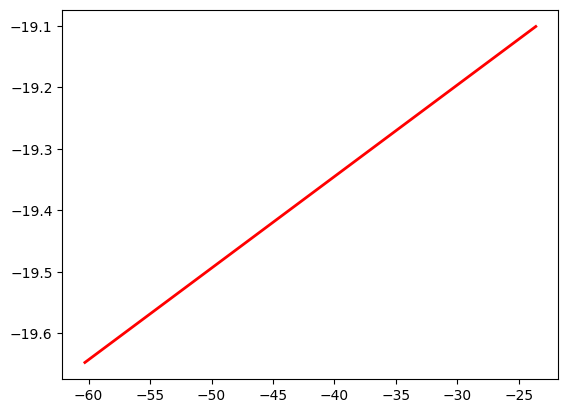

In [ ]:
path, total_distance = dijkstra(graph, start_star, end_star)

if path:
  for i in range(len(path) - 1):
    star1_data = next(star for star in stars if star["IAU Name"] == path[i])
    star2_data = next(star for star in stars if star["IAU Name"] == path[i + 1])
    plt.plot([star1_data["X"], star2_data["X"]], [star1_data["Y"], star2_data["Y"]], 'r-', linewidth=2)  # 'r-' for red lines

plt.show()

In [ ]:
graph = build_graph(stars)  # Or graph = build_graph(stars, max_dist=some_value)

In [ ]:
def bfs(graph, start_node):
  visited_nodes = [start_node]
  queue = [start_node]
  while queue:
    current_node = queue.pop(0)
    for next_node in graph[current_node]:
      if next_node not in visited_nodes:
        visited_nodes.append(next_node)
        queue.append(next_node)
  return visited_nodes

In [ ]:
def dfs(graph, start_node, visited_nodes=None):
    if visited_nodes is None:
      visited_nodes = []
    visited_nodes.append(start_node)
    for next_node in graph[start_node]:
        if next_node not in visited_nodes:
          dfs(graph, next_node, visited_nodes)
    return visited_nodes

In [ ]:
def visualize_traversal(stars, graph, visited_nodes):
    plot_stars(stars)
    plt.figure(figsize=(8, 8))
    x_coords = [star["X"] for star in stars]
    y_coords = [star["Y"] for star in stars]

    for star in stars:
      if star['IAU Name'] in visited_nodes:
         plt.scatter(star["X"], star["Y"], s=20, color="red")  # Adjust point size (s) as needed
      else:
        plt.scatter(star["X"], star["Y"], s=20, color="green")  # Adjust point size (s) as needed

    for node_id, neighbors in graph.items():
        star_node = next(star for star in stars if star["IAU Name"] == node_id)
        for neighbor_id in neighbors:
            star_neighbor = next(star for star in stars if star["IAU Name"] == neighbor_id)
            if neighbor_id in visited_nodes:
              plt.plot([star_node["X"], star_neighbor["X"]], [star_node["Y"], star_neighbor["Y"]],) #color=""





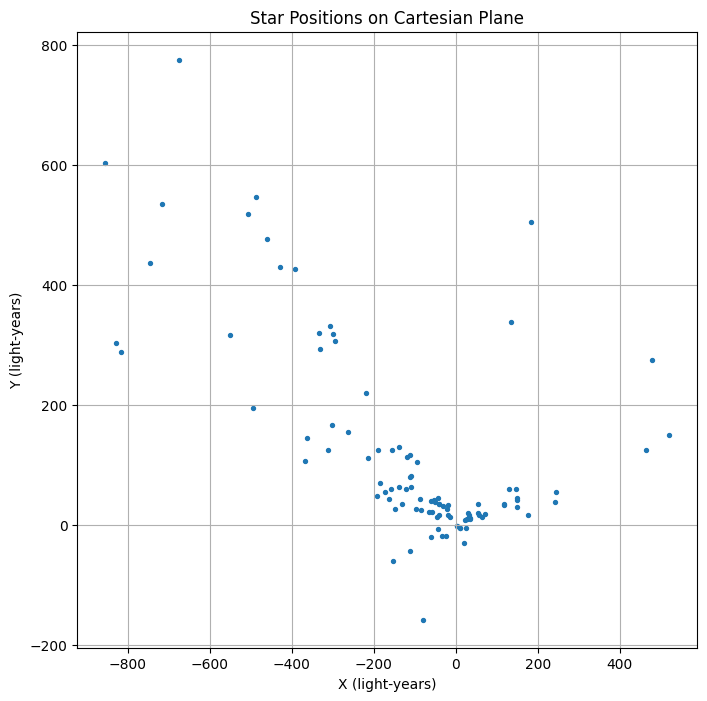

In [ ]:
%matplotlib inline
stars = load_data("realdata.csv")  # Assuming 'load_data' is defined as in your previous code
plot_stars(stars)  # Call the function to generate and display the plot